In [ ]:
import tensorflow as tf
import keras


from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D, concatenate
from keras.layers.convolutional import Conv2D
from keras.layers.recurrent import SimpleRNN, LSTM, GRU 
from keras.utils import np_utils

from keras.datasets import mnist, fashion_mnist, imdb

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
from functools import partial

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# Prepare datasets

num_classes = 10

# mnist dataset
# the data, split between train and test sets
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

mnist_x_train_flat = mnist_x_train.reshape(60000, 784)
mnist_x_test_flat = mnist_x_test.reshape(10000, 784)
mnist_x_train_flat = mnist_x_train_flat.astype('float32')
mnist_x_test_flat = mnist_x_test_flat.astype('float32')
mnist_x_train_flat /= 255
mnist_x_test_flat /= 255

# convert class vectors to binary class matrices
mnist_y_train = np_utils.to_categorical(mnist_y_train, num_classes)
mnist_y_test = np_utils.to_categorical(mnist_y_test, num_classes)

print(mnist_x_train.shape[0], 'MNIST train samples')
print(mnist_x_test.shape[0], 'MNIST test samples')

# fmnist dataset
# the data, split between train and test sets
(fmnist_x_train, fmnist_y_train), (fmnist_x_test, fmnist_y_test) = fashion_mnist.load_data()

fmnist_x_train_flat = fmnist_x_train.reshape(60000, 784)
fmnist_x_test_flat = fmnist_x_test.reshape(10000, 784)
fmnist_x_train_flat = fmnist_x_train_flat.astype('float32')
fmnist_x_test_flat = fmnist_x_test_flat.astype('float32')
fmnist_x_train_flat /= 255
fmnist_x_test_flat /= 255

# convert class vectors to binary class matrices
fmnist_y_train = np_utils.to_categorical(fmnist_y_train, num_classes)
fmnist_y_test = np_utils.to_categorical(fmnist_y_test, num_classes)

print(fmnist_x_train.shape[0], 'FMNIST train samples')
print(fmnist_x_test.shape[0], 'FMNIST test samples')


In [ ]:
# Testing setup

tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Task 1

In [ ]:
# Experiment with mnist_mlp.py and mnist_cnn.py

# mnist_mlp.py ##################################

batch_size = 128
num_classes = 10
epochs = 9

# Old mnist_mlp.py code

"""
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(784,))) # Input
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax')) # Output

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

history = model.fit(mnist_x_train, 
                    mnist_y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

score = model.evaluate(mnist_x_test, 
                       mnist_y_test, 
                       verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
"""

# MLP for MNIST

input = tf.keras.Input(shape=(784,))
input_layer = Dense(512, activation='relu')(input)
layer1 = Dropout(0.2)(input_layer)
layer2 = Dense(512, activation='relu')(layer1)
layer3 = Dropout(0.2)(layer2)
output_layer = Dense(num_classes, activation='softmax')(layer3)

model_mlp = tf.keras.Model(inputs=input, 
                           outputs=output_layer, 
                           name='model_mlp')

model_mlp.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.RMSprop(), 
                  metrics=['accuracy'])

history_mlp = model_mlp.fit(mnist_x_train_flat,
                            mnist_y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.2)

score_mlp = model_mlp.evaluate(mnist_x_test_flat,
                               mnist_y_test,
                               verbose=0)

print('Test loss:', score_mlp[0])
print('Test accuracy:', score_mlp[1])

####################################################################

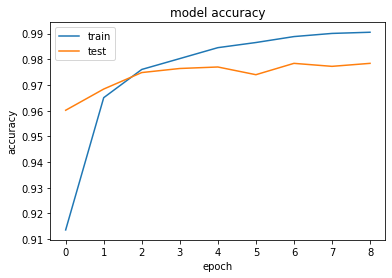

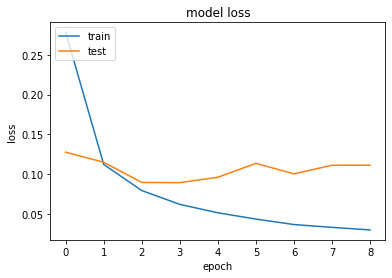

In [ ]:
# Plot accuracy
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# MLP for FMNIST

input = tf.keras.Input(shape=(784,))
input_layer = Dense(512, activation='relu')(input)
layer1 = Dropout(0.2)(input_layer)
layer2 = Dense(512, activation='relu')(layer1)
layer3 = Dropout(0.2)(layer2)
output_layer = Dense(num_classes, activation='softmax')(layer3)

model_mlp = tf.keras.Model(inputs=input, 
                           outputs=output_layer, 
                           name='model_mlp')

model_mlp.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.RMSprop(), 
                  metrics=['accuracy'])

history_mlp = model_mlp.fit(fmnist_x_train_flat,
                            fmnist_y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.2)

score_mlp = model_mlp.evaluate(fmnist_x_test_flat,
                               fmnist_y_test,
                               verbose=0)

print('Test loss:', score_mlp[0])
print('Test accuracy:', score_mlp[1])


Epoch 1/9
375/375 [==============================] - 3s 6ms/step - loss: 0.5844 - accuracy: 0.7866 - val_loss: 0.4782 - val_accuracy: 0.8223
Epoch 2/9
375/375 [==============================] - 2s 6ms/step - loss: 0.4176 - accuracy: 0.8457 - val_loss: 0.3763 - val_accuracy: 0.8642
Epoch 3/9
375/375 [==============================] - 2s 6ms/step - loss: 0.3793 - accuracy: 0.8612 - val_loss: 0.3595 - val_accuracy: 0.8677
Epoch 4/9
375/375 [==============================] - 2s 6ms/step - loss: 0.3533 - accuracy: 0.8714 - val_loss: 0.3570 - val_accuracy: 0.8779
Epoch 5/9
375/375 [==============================] - 2s 6ms/step - loss: 0.3354 - accuracy: 0.8780 - val_loss: 0.3759 - val_accuracy: 0.8627
Epoch 6/9
375/375 [==============================] - 2s 6ms/step - loss: 0.3277 - accuracy: 0.8806 - val_loss: 0.3520 - val_accuracy: 0.8757
Epoch 7/9
375/375 [==============================] - 2s 6ms/step - loss: 0.3195 - accuracy: 0.8856 - val_loss: 0.3435 - val_accuracy: 0.8809
Epoch 8/9
375

In [ ]:
# mnist_cnn.py #####################################################

batch_size = 128
num_classes = 10
epochs = 12


# Old mnist_cnn.py code
"""

(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(mnist_x_train, mnist_y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(mnist_x_test, mnist_y_test))

score = model.evaluate(mnist_x_test, mnist_y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

"""
# CNN for MNIST

input = tf.keras.Input(shape=(28, 28, 1))
input_layer = Conv2D(32, kernel_size=3, activation='relu')(input)
layer1 = Conv2D(64, kernel_size=3, activation='relu')(input_layer)
layer2 = MaxPooling2D(pool_size=2)(layer1)
layer3 = Dropout(0.25)(layer2)
layer4 = Flatten()(layer3)
layer5 = Dense(128, activation='relu')(layer4)
layer6 = Dropout(0.5)(layer5)
output_layer = Dense(num_classes, activation='softmax')(layer6)

model_cnn = tf.keras.Model(inputs=input, 
                           outputs=output_layer,
                           name='model_cnn')

model_cnn.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

history_cnn = model_cnn.fit(mnist_x_train, 
                            mnist_y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.2)

score_cnn = model_cnn.evaluate(mnist_x_test, 
                               mnist_y_test, 
                               verbose=0)


print('Test loss:', score_cnn[0])
print('Test accuracy:', score_cnn[1])

Epoch 1/12
375/375 [==============================] - 34s 17ms/step - loss: 25.0424 - accuracy: 0.1297 - val_loss: 4.5756 - val_accuracy: 0.3827
Epoch 2/12
375/375 [==============================] - 6s 17ms/step - loss: 12.4704 - accuracy: 0.2202 - val_loss: 2.1972 - val_accuracy: 0.5370
Epoch 3/12
375/375 [==============================] - 6s 17ms/step - loss: 7.2534 - accuracy: 0.2882 - val_loss: 1.4655 - val_accuracy: 0.5741
Epoch 4/12
375/375 [==============================] - 6s 17ms/step - loss: 4.6891 - accuracy: 0.3176 - val_loss: 1.3602 - val_accuracy: 0.5523
Epoch 5/12
375/375 [==============================] - 6s 17ms/step - loss: 3.3235 - accuracy: 0.3269 - val_loss: 1.4954 - val_accuracy: 0.5100
Epoch 6/12
375/375 [==============================] - 6s 17ms/step - loss: 2.6493 - accuracy: 0.3335 - val_loss: 1.6249 - val_accuracy: 0.4746
Epoch 7/12
375/375 [==============================] - 6s 17ms/step - loss: 2.3118 - accuracy: 0.3313 - val_loss: 1.6878 - val_accuracy: 0.4

In [ ]:
# CNN for FMNIST

input = tf.keras.Input(shape=(28, 28, 1))
input_layer = Conv2D(32, kernel_size=3, activation='relu')(input)
layer1 = Conv2D(64, kernel_size=3, activation='relu')(input_layer)
layer2 = MaxPooling2D(pool_size=2)(layer1)
layer3 = Dropout(0.25)(layer2)
layer4 = Flatten()(layer3)
layer5 = Dense(128, activation='relu')(layer4)
layer6 = Dropout(0.5)(layer5)
output_layer = Dense(num_classes, activation='softmax')(layer6)

model_cnn = tf.keras.Model(inputs=input, 
                           outputs=output_layer,
                           name='model_cnn')

model_cnn.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

history_cnn = model_cnn.fit(fmnist_x_train, 
                            fmnist_y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.2)

score_cnn = model_cnn.evaluate(fmnist_x_test, 
                               fmnist_y_test, 
                               verbose=0)

print('Test loss:', score_cnn[0])
print('Test accuracy:', score_cnn[1])

Epoch 1/12
375/375 [==============================] - 7s 17ms/step - loss: 24.5099 - accuracy: 0.1754 - val_loss: 3.7858 - val_accuracy: 0.5220
Epoch 2/12
375/375 [==============================] - 6s 17ms/step - loss: 10.7289 - accuracy: 0.2844 - val_loss: 1.7452 - val_accuracy: 0.5776
Epoch 3/12
375/375 [==============================] - 6s 17ms/step - loss: 5.6367 - accuracy: 0.3315 - val_loss: 1.3544 - val_accuracy: 0.5581
Epoch 4/12
375/375 [==============================] - 6s 17ms/step - loss: 3.4367 - accuracy: 0.3459 - val_loss: 1.4805 - val_accuracy: 0.5307
Epoch 5/12
375/375 [==============================] - 6s 17ms/step - loss: 2.5731 - accuracy: 0.3516 - val_loss: 1.5722 - val_accuracy: 0.5183
Epoch 6/12
375/375 [==============================] - 6s 17ms/step - loss: 2.2299 - accuracy: 0.3656 - val_loss: 1.5733 - val_accuracy: 0.5285
Epoch 7/12
375/375 [==============================] - 6s 17ms/step - loss: 2.0511 - accuracy: 0.3776 - val_loss: 1.5378 - val_accuracy: 0.55

In [ ]:
# Final improved (V5) version of CNN for MNIST

input = tf.keras.Input(shape=(28, 28, 1), name='Input')

input_layer = Conv2D(64, 7, activation='relu', name='relu_1', padding='same')(input)

layer1 = MaxPooling2D(2, name='2_1')(input_layer)
layer2 = Conv2D(128, 3, activation='relu', name='relu_2', padding='same')(layer1)
layer3 = Conv2D(128, 3, activation='relu', name='relu_3', padding='same')(layer2)
layer4 = MaxPooling2D(2, name='2_2')(layer3)
layer5 = Conv2D(256, 3, activation='relu', name='relu_4', padding='same')(layer4)
layer6 = Conv2D(256, 3, activation='relu', name='relu_5', padding='same')(layer5)
layer7 = MaxPooling2D(2, name='2_3')(layer6)
layer8 = Flatten(name='flatten_1')(layer7)
layer9 = Dense(128, activation='relu',name='relu_6')(layer8)
layer10 = Dropout(0.5, name='0.5_1')(layer9)
layer11 = Dense(64, activation='relu', name='relu_7')(layer10)
layer12 = Dropout(0.5, name='0.5_2')(layer11)

output_layer = Dense(num_classes, activation='softmax', name='Output_softmax')(layer12)

model_cnn_v5 = tf.keras.Model(inputs=input, 
                           outputs=output_layer,
                           name='model_cnn')

model_cnn_v5.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.SGD(),
                  metrics=['accuracy'])

history_cnn_v5 = model_cnn_v5.fit(mnist_x_train, 
                            mnist_y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.2)

score_cnn_v5 = model_cnn_v5.evaluate(mnist_x_test, 
                               mnist_y_test, 
                               verbose=0)

print('Test loss:', score_cnn_v5[0])
print('Test accuracy:', score_cnn_v5[1])

Epoch 1/12
375/375 [==============================] - 15s 39ms/step - loss: 1.4012 - accuracy: 0.5521 - val_loss: 0.1578 - val_accuracy: 0.9620
Epoch 2/12
375/375 [==============================] - 14s 38ms/step - loss: 0.4020 - accuracy: 0.8754 - val_loss: 0.0762 - val_accuracy: 0.9793
Epoch 3/12
375/375 [==============================] - 14s 38ms/step - loss: 0.2516 - accuracy: 0.9242 - val_loss: 0.0591 - val_accuracy: 0.9842
Epoch 4/12
375/375 [==============================] - 14s 38ms/step - loss: 0.1924 - accuracy: 0.9434 - val_loss: 0.0583 - val_accuracy: 0.9869
Epoch 5/12
375/375 [==============================] - 14s 38ms/step - loss: 0.1559 - accuracy: 0.9558 - val_loss: 0.0491 - val_accuracy: 0.9877
Epoch 6/12
375/375 [==============================] - 14s 38ms/step - loss: 0.1306 - accuracy: 0.9630 - val_loss: 0.0443 - val_accuracy: 0.9896
Epoch 7/12
375/375 [==============================] - 14s 38ms/step - loss: 0.1177 - accuracy: 0.9667 - val_loss: 0.0491 - val_accuracy:

In [ ]:
# Final improved version (V5) of CNN for FMNIST

input = tf.keras.Input(shape=(28, 28, 1), name='Input')

input_layer = Conv2D(64, 7, activation='relu', name='relu_1', padding='same')(input)

layer1 = MaxPooling2D(2, name='2_1')(input_layer)
layer2 = Conv2D(128, 3, activation='relu', name='relu_2', padding='same')(layer1)
layer3 = Conv2D(128, 3, activation='relu', name='relu_3', padding='same')(layer2)
layer4 = MaxPooling2D(2, name='2_2')(layer3)
layer5 = Conv2D(256, 3, activation='relu', name='relu_4', padding='same')(layer4)
layer6 = Conv2D(256, 3, activation='relu', name='relu_5', padding='same')(layer5)
layer7 = MaxPooling2D(2, name='2_3')(layer6)
layer8 = Flatten(name='flatten_1')(layer7)
layer9 = Dense(128, activation='relu',name='relu_6')(layer8)
layer10 = Dropout(0.5, name='0.5_1')(layer9)
layer11 = Dense(64, activation='relu', name='relu_7')(layer10)
layer12 = Dropout(0.5, name='0.5_2')(layer11)

output_layer = Dense(num_classes, activation='softmax', name='Output_softmax')(layer12)

model_cnn_v5 = tf.keras.Model(inputs=input, 
                           outputs=output_layer,
                           name='model_cnn')

model_cnn_v5.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.SGD(),
                  metrics=['accuracy'])

history_cnn_v5 = model_cnn_v5.fit(fmnist_x_train, 
                            fmnist_y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.2)

score_cnn_v5 = model_cnn_v5.evaluate(fmnist_x_test, 
                               fmnist_y_test, 
                               verbose=0)

print('Test loss:', score_cnn_v5[0])
print('Test accuracy:', score_cnn_v5[1])

Epoch 1/12
375/375 [==============================] - 15s 39ms/step - loss: 1.5359 - accuracy: 0.4904 - val_loss: 0.6152 - val_accuracy: 0.8028
Epoch 2/12
375/375 [==============================] - 14s 38ms/step - loss: 0.8218 - accuracy: 0.7117 - val_loss: 0.4836 - val_accuracy: 0.8376
Epoch 3/12
375/375 [==============================] - 14s 38ms/step - loss: 0.6759 - accuracy: 0.7656 - val_loss: 0.4204 - val_accuracy: 0.8572
Epoch 4/12
375/375 [==============================] - 14s 38ms/step - loss: 0.5922 - accuracy: 0.7987 - val_loss: 0.3953 - val_accuracy: 0.8620
Epoch 5/12
375/375 [==============================] - 14s 38ms/step - loss: 0.5391 - accuracy: 0.8178 - val_loss: 0.3807 - val_accuracy: 0.8719
Epoch 6/12
375/375 [==============================] - 14s 38ms/step - loss: 0.5045 - accuracy: 0.8294 - val_loss: 0.3547 - val_accuracy: 0.8773
Epoch 7/12
375/375 [==============================] - 14s 38ms/step - loss: 0.4826 - accuracy: 0.8366 - val_loss: 0.3480 - val_accuracy:

# Task 2

In [ ]:
permutation = np.random.permutation(784) # This is to ensure we have a single random perumation of the pixels

# Apply the same permutation to each dataset
mnist_train_permutated_flat = mnist_x_train_flat.T[permutation].T
mnist_train_permutated = mnist_train_permutated_flat.reshape((60000, 28, 28))

mnist_test_permutated_flat = mnist_x_test_flat.T[permutation].T
mnist_test_permutated = mnist_test_permutated_flat.reshape((10000, 28, 28))

fmnist_train_permutated_flat = fmnist_x_train_flat.T[permutation].T
fmnist_train_permutated = fmnist_train_permutated_flat.reshape((60000, 28, 28))

fmnist_test_permutated_flat = fmnist_x_test_flat.T[permutation].T
fmnist_test_permutated = fmnist_test_permutated_flat.reshape((10000, 28, 28))

In [ ]:
# MLP for permutated MNIST

batch_size = 128
num_classes = 10
epochs = 9

input = tf.keras.Input(shape=(784,))
input_layer = Dense(512, activation='relu')(input)
layer1 = Dropout(0.2)(input_layer)
layer2 = Dense(512, activation='relu')(layer1)
layer3 = Dropout(0.2)(layer2)
output_layer = Dense(num_classes, activation='softmax')(layer3)

model_mlp = tf.keras.Model(inputs=input, 
                           outputs=output_layer, 
                           name='model_mlp')

model_mlp.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.RMSprop(), 
                  metrics=['accuracy'])

history_mlp = model_mlp.fit(mnist_train_permutated_flat,
                            mnist_y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.2)

score_mlp = model_mlp.evaluate(mnist_test_permutated_flat,
                               mnist_y_test,
                               verbose=0)

print('Test loss:', score_mlp[0])
print('Test accuracy:', score_mlp[1])

Epoch 1/9
375/375 [==============================] - 3s 7ms/step - loss: 0.2760 - accuracy: 0.9147 - val_loss: 0.1221 - val_accuracy: 0.9621
Epoch 2/9
375/375 [==============================] - 2s 6ms/step - loss: 0.1121 - accuracy: 0.9659 - val_loss: 0.1126 - val_accuracy: 0.9677
Epoch 3/9
375/375 [==============================] - 2s 6ms/step - loss: 0.0799 - accuracy: 0.9756 - val_loss: 0.0924 - val_accuracy: 0.9739
Epoch 4/9
375/375 [==============================] - 2s 6ms/step - loss: 0.0625 - accuracy: 0.9805 - val_loss: 0.0916 - val_accuracy: 0.9777
Epoch 5/9
375/375 [==============================] - 2s 6ms/step - loss: 0.0513 - accuracy: 0.9841 - val_loss: 0.0868 - val_accuracy: 0.9772
Epoch 6/9
375/375 [==============================] - 2s 6ms/step - loss: 0.0425 - accuracy: 0.9864 - val_loss: 0.0980 - val_accuracy: 0.9776
Epoch 7/9
375/375 [==============================] - 2s 6ms/step - loss: 0.0373 - accuracy: 0.9887 - val_loss: 0.0972 - val_accuracy: 0.9782
Epoch 8/9
375

In [ ]:
# MLP for permutated FMNIST

input = tf.keras.Input(shape=(784,))
input_layer = Dense(512, activation='relu')(input)
layer1 = Dropout(0.2)(input_layer)
layer2 = Dense(512, activation='relu')(layer1)
layer3 = Dropout(0.2)(layer2)
output_layer = Dense(num_classes, activation='softmax')(layer3)

model_mlp = tf.keras.Model(inputs=input, 
                           outputs=output_layer, 
                           name='model_mlp')

model_mlp.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.RMSprop(), 
                  metrics=['accuracy'])

history_mlp = model_mlp.fit(fmnist_train_permutated_flat,
                            fmnist_y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.2)

score_mlp = model_mlp.evaluate(fmnist_test_permutated_flat,
                               fmnist_y_test,
                               verbose=0)

print('Test loss:', score_mlp[0])
print('Test accuracy:', score_mlp[1])

Epoch 1/9
375/375 [==============================] - 3s 7ms/step - loss: 0.5862 - accuracy: 0.7873 - val_loss: 0.5037 - val_accuracy: 0.8156
Epoch 2/9
375/375 [==============================] - 2s 6ms/step - loss: 0.4170 - accuracy: 0.8473 - val_loss: 0.3883 - val_accuracy: 0.8565
Epoch 3/9
375/375 [==============================] - 2s 6ms/step - loss: 0.3740 - accuracy: 0.8623 - val_loss: 0.3482 - val_accuracy: 0.8752
Epoch 4/9
375/375 [==============================] - 2s 6ms/step - loss: 0.3550 - accuracy: 0.8710 - val_loss: 0.3626 - val_accuracy: 0.8680
Epoch 5/9
375/375 [==============================] - 2s 6ms/step - loss: 0.3385 - accuracy: 0.8760 - val_loss: 0.3383 - val_accuracy: 0.8834
Epoch 6/9
375/375 [==============================] - 2s 6ms/step - loss: 0.3263 - accuracy: 0.8831 - val_loss: 0.3692 - val_accuracy: 0.8718
Epoch 7/9
375/375 [==============================] - 2s 6ms/step - loss: 0.3148 - accuracy: 0.8857 - val_loss: 0.3483 - val_accuracy: 0.8827
Epoch 8/9
375

In [ ]:
# CNN for permutated MNIST

batch_size = 128
num_classes = 10
epochs = 12

input = tf.keras.Input(shape=(28, 28, 1), name='Input')

input_layer = Conv2D(64, 7, activation='relu', name='relu_1', padding='same')(input)

layer1 = MaxPooling2D(2, name='2_1')(input_layer)
layer2 = Conv2D(128, 3, activation='relu', name='relu_2', padding='same')(layer1)
layer3 = Conv2D(128, 3, activation='relu', name='relu_3', padding='same')(layer2)
layer4 = MaxPooling2D(2, name='2_2')(layer3)
layer5 = Conv2D(256, 3, activation='relu', name='relu_4', padding='same')(layer4)
layer6 = Conv2D(256, 3, activation='relu', name='relu_5', padding='same')(layer5)
layer7 = MaxPooling2D(2, name='2_3')(layer6)
layer8 = Flatten(name='flatten_1')(layer7)
layer9 = Dense(128, activation='relu',name='relu_6')(layer8)
layer10 = Dropout(0.5, name='0.5_1')(layer9)
layer11 = Dense(64, activation='relu', name='relu_7')(layer10)
layer12 = Dropout(0.5, name='0.5_2')(layer11)

output_layer = Dense(num_classes, activation='softmax', name='Output_softmax')(layer12)

model_cnn_v5 = tf.keras.Model(inputs=input, 
                           outputs=output_layer,
                           name='model_cnn')

model_cnn_v5.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.SGD(),
                  metrics=['accuracy'])

history_cnn_v5 = model_cnn_v5.fit(mnist_train_permutated, 
                            mnist_y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.2)

score_cnn_v5 = model_cnn_v5.evaluate(mnist_test_permutated, 
                               mnist_y_test, 
                               verbose=0)

print('Test loss:', score_cnn_v5[0])
print('Test accuracy:', score_cnn_v5[1])

Epoch 1/12
375/375 [==============================] - 15s 39ms/step - loss: 2.2959 - accuracy: 0.1434 - val_loss: 2.2842 - val_accuracy: 0.1547
Epoch 2/12
375/375 [==============================] - 14s 38ms/step - loss: 2.2643 - accuracy: 0.2015 - val_loss: 2.2134 - val_accuracy: 0.3590
Epoch 3/12
375/375 [==============================] - 14s 38ms/step - loss: 2.1456 - accuracy: 0.2486 - val_loss: 1.9104 - val_accuracy: 0.4428
Epoch 4/12
375/375 [==============================] - 14s 38ms/step - loss: 1.8350 - accuracy: 0.3497 - val_loss: 1.3901 - val_accuracy: 0.5826
Epoch 5/12
375/375 [==============================] - 14s 38ms/step - loss: 1.4560 - accuracy: 0.4938 - val_loss: 0.9479 - val_accuracy: 0.7266
Epoch 6/12
375/375 [==============================] - 14s 38ms/step - loss: 1.1671 - accuracy: 0.6035 - val_loss: 0.7481 - val_accuracy: 0.7793
Epoch 7/12
375/375 [==============================] - 14s 38ms/step - loss: 0.9630 - accuracy: 0.6850 - val_loss: 0.5781 - val_accuracy:

In [ ]:
# CNN for permutated FMNIST

input = tf.keras.Input(shape=(28, 28, 1), name='Input')

input_layer = Conv2D(64, 7, activation='relu', name='relu_1', padding='same')(input)

layer1 = MaxPooling2D(2, name='2_1')(input_layer)
layer2 = Conv2D(128, 3, activation='relu', name='relu_2', padding='same')(layer1)
layer3 = Conv2D(128, 3, activation='relu', name='relu_3', padding='same')(layer2)
layer4 = MaxPooling2D(2, name='2_2')(layer3)
layer5 = Conv2D(256, 3, activation='relu', name='relu_4', padding='same')(layer4)
layer6 = Conv2D(256, 3, activation='relu', name='relu_5', padding='same')(layer5)
layer7 = MaxPooling2D(2, name='2_3')(layer6)
layer8 = Flatten(name='flatten_1')(layer7)
layer9 = Dense(128, activation='relu',name='relu_6')(layer8)
layer10 = Dropout(0.5, name='0.5_1')(layer9)
layer11 = Dense(64, activation='relu', name='relu_7')(layer10)
layer12 = Dropout(0.5, name='0.5_2')(layer11)

output_layer = Dense(num_classes, activation='softmax', name='Output_softmax')(layer12)

model_cnn_v5 = tf.keras.Model(inputs=input, 
                           outputs=output_layer,
                           name='model_cnn')

model_cnn_v5.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.SGD(),
                  metrics=['accuracy'])

history_cnn_v5 = model_cnn_v5.fit(fmnist_train_permutated, 
                            fmnist_y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.2)

score_cnn_v5 = model_cnn_v5.evaluate(fmnist_test_permutated, 
                               fmnist_y_test, 
                               verbose=0)

print('Test loss:', score_cnn_v5[0])
print('Test accuracy:', score_cnn_v5[1])

Epoch 1/12
375/375 [==============================] - 15s 39ms/step - loss: 2.2873 - accuracy: 0.1502 - val_loss: 2.2448 - val_accuracy: 0.3415
Epoch 2/12
375/375 [==============================] - 14s 38ms/step - loss: 2.1400 - accuracy: 0.2049 - val_loss: 1.8850 - val_accuracy: 0.3368
Epoch 3/12
375/375 [==============================] - 15s 39ms/step - loss: 1.8635 - accuracy: 0.2966 - val_loss: 1.4016 - val_accuracy: 0.5246
Epoch 4/12
375/375 [==============================] - 14s 38ms/step - loss: 1.4810 - accuracy: 0.4271 - val_loss: 1.0645 - val_accuracy: 0.6474
Epoch 5/12
375/375 [==============================] - 14s 38ms/step - loss: 1.2070 - accuracy: 0.5435 - val_loss: 0.8966 - val_accuracy: 0.6777
Epoch 6/12
375/375 [==============================] - 14s 38ms/step - loss: 1.0479 - accuracy: 0.6042 - val_loss: 0.7778 - val_accuracy: 0.7165
Epoch 7/12
375/375 [==============================] - 14s 38ms/step - loss: 0.9451 - accuracy: 0.6464 - val_loss: 0.7293 - val_accuracy:

# Task 3

In [ ]:
# Task 3
# Loading the data

############################## Path for Andy PC

from google.colab import drive
drive.mount('/content/drive')

#path = '/content/drive/MyDrive/IDL/'
#clock_data = np.load(path + "images.npy").astype("float32")
#clock_data /= 255
#clock_target = np.load(path + "labels.npy").astype("float32")

############################## Path when uploaded

clock_data = np.load("drive/MyDrive/images.npy").astype("float32")
clock_data /= 255
clock_target = np.load("drive/MyDrive/labels.npy").astype("float32")

##############################


# Since the data is ordered in ascending order, we need to shuffle it

permutation = np.random.permutation(clock_data.shape[0])

clock_data = clock_data[permutation]
clock_target = clock_target[permutation]

print(clock_target[0])

# For regression model we want the time from e.g [5. 36.] in format y = 5.36
# So we want y=clock_target[i][0].clock_target[i][1]

def time_changer(initial):
  hr = initial[0]
  min = initial[1]/60
  time = hr + min
  return time

clock_target_new = []

for i in clock_target:
  clock_target_new.append(time_changer(i))

clock_target_new = np.array(clock_target_new).astype("float32")
print(clock_target_new[0])


# Now we put aside 80% for the train set, and 20% for the test set
clock_train_x = clock_data[:int(0.8*len(clock_data))]
clock_train_y = clock_target_new[:int(0.8*len(clock_data))]
clock_test_x = clock_data[int(0.8*len(clock_data)):]
clock_test_y = clock_target_new[int(0.8*len(clock_data)):]

# Keep in vector form for multi_head
clock_target_vec = clock_target # To get our minutes between 0 and 1
clock_target_vec[:,1] /= 60
clock_train_y_vec = clock_target_vec[:int(0.8*len(clock_data))]
clock_test_y_vec = clock_target_vec[int(0.8*len(clock_data)):]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[ 6. 31.]
6.516667


In [ ]:
# Naively use the previous CNN on new data

batch_size = 128
epochs = 12

input = tf.keras.Input(shape=(150, 150, 1), name='Input')

input_layer = Conv2D(64, 7, activation='relu', name='relu_1', padding='same')(input)

layer1 = MaxPooling2D(2, name='2_1')(input_layer)
layer2 = Conv2D(128, 3, activation='relu', name='relu_2', padding='same')(layer1)
layer3 = Conv2D(128, 3, activation='relu', name='relu_3', padding='same')(layer2)
layer4 = MaxPooling2D(2, name='2_2')(layer3)
layer5 = Conv2D(256, 3, activation='relu', name='relu_4', padding='same')(layer4)
layer6 = Conv2D(256, 3, activation='relu', name='relu_5', padding='same')(layer5)
layer7 = MaxPooling2D(2, name='2_3')(layer6)
layer8 = Flatten(name='flatten_1')(layer7)
layer9 = Dense(128, activation='relu',name='relu_6')(layer8)
layer10 = Dropout(0.5, name='0.5_1')(layer9)
layer11 = Dense(64, activation='relu', name='relu_7')(layer10)
layer12 = Dropout(0.5, name='0.5_2')(layer11)

output_layer = Dense(1, activation='softmax', name='Output_softmax')(layer12)

model_clock = tf.keras.Model(inputs=input, 
                           outputs=output_layer,
                           name='model_clock')

model_clock.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.SGD(),
                  metrics=['accuracy'])

history_clock = model_clock.fit(clock_train_x, 
                            clock_train_y,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.2)

score_clock = model_clock.evaluate(clock_test_x, 
                               clock_test_y, 
                               verbose=0)

print('Test loss:', score_clock[0])
print('Test accuracy:', score_clock[1])

####################################

"""
batch_size = 64
epochs = 10

input = tf.keras.Input(shape=(150, 150, 1))
input_layer = Conv2D(64, kernel_size=5, activation='relu')(input)
layer1 = Conv2D(128, kernel_size=3, activation='relu')(input_layer)
layer2 = MaxPooling2D(pool_size=2)(layer1)
layer3 = Dropout(0.5)(layer2)
layer4 = Flatten()(layer3)
layer5 = Dense(128, activation='relu')(layer4)
layer6 = Dropout(0.2)(layer5)
output_layer = Dense(1, activation='softmax')(layer6)

model_simple_reg = tf.keras.Model(inputs=input, 
                           outputs=output_layer,
                           name='model_simple_reg')

model_simple_reg.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

history_reg = model_simple_reg.fit(clock_train_x, 
                            clock_train_y,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_split = 0.2)

score_reg = model_simple_reg.evaluate(clock_test_x, 
                               clock_test_y, 
                               verbose=0)

print('Test loss:', score_reg[0])
print('Test accuracy:', score_reg[1])
"""

Epoch 1/12
90/90 [==============================] - 68s 753ms/step - loss: nan - accuracy: 0.0015 - val_loss: nan - val_accuracy: 0.0014
Epoch 2/12
90/90 [==============================] - 67s 747ms/step - loss: nan - accuracy: 0.0015 - val_loss: nan - val_accuracy: 0.0014
Epoch 3/12
90/90 [==============================] - 67s 747ms/step - loss: nan - accuracy: 0.0015 - val_loss: nan - val_accuracy: 0.0014
Epoch 4/12
90/90 [==============================] - 67s 747ms/step - loss: nan - accuracy: 0.0015 - val_loss: nan - val_accuracy: 0.0014
Epoch 5/12
90/90 [==============================] - 67s 747ms/step - loss: nan - accuracy: 0.0015 - val_loss: nan - val_accuracy: 0.0014
Epoch 6/12
90/90 [==============================] - 67s 747ms/step - loss: nan - accuracy: 0.0015 - val_loss: nan - val_accuracy: 0.0014
Epoch 7/12
90/90 [==============================] - 67s 746ms/step - loss: nan - accuracy: 0.0015 - val_loss: nan - val_accuracy: 0.0014
Epoch 8/12
90/90 [=======================

"\nbatch_size = 64\nepochs = 10\n\ninput = tf.keras.Input(shape=(150, 150, 1))\ninput_layer = Conv2D(64, kernel_size=5, activation='relu')(input)\nlayer1 = Conv2D(128, kernel_size=3, activation='relu')(input_layer)\nlayer2 = MaxPooling2D(pool_size=2)(layer1)\nlayer3 = Dropout(0.5)(layer2)\nlayer4 = Flatten()(layer3)\nlayer5 = Dense(128, activation='relu')(layer4)\nlayer6 = Dropout(0.2)(layer5)\noutput_layer = Dense(1, activation='softmax')(layer6)\n\nmodel_simple_reg = tf.keras.Model(inputs=input, \n                           outputs=output_layer,\n                           name='model_simple_reg')\n\nmodel_simple_reg.compile(loss=keras.losses.categorical_crossentropy,\n                  optimizer=tf.keras.optimizers.Adam(),\n                  metrics=['accuracy'])\n\nhistory_reg = model_simple_reg.fit(clock_train_x, \n                            clock_train_y,\n                            batch_size=batch_size,\n                            epochs=epochs,\n                            

This does not work at all. Accuracy stays constant and loss only gives NaN.

In [ ]:
# Multi-head model #TAKES VERY LONG AND ACCURACY BAD

batch_size = 32
epochs = 100

input = tf.keras.Input(shape=(150, 150, 1))

input_layer = Conv2D(64, 7, activation='relu', name='relu_1', padding='same')(input)

layer1 = MaxPooling2D(2, name='2_1')(input_layer)
layer2 = Conv2D(128, 3, activation='relu', name='relu_2', padding='same')(layer1)
layer3 = Conv2D(128, 3, activation='relu', name='relu_3', padding='same')(layer2)
layer4 = MaxPooling2D(2, name='2_2')(layer3)
layer5 = Conv2D(256, 3, activation='relu', name='relu_4', padding='same')(layer4)
layer6 = Conv2D(256, 3, activation='relu', name='relu_5', padding='same')(layer5)
layer7 = MaxPooling2D(2, name='2_3')(layer6)
layer8 = Flatten(name='flatten_1')(layer7)
layer9 = Dense(128, activation='relu', name='relu_6')(layer8)
layer9_1 = Dropout(0.2, name='2_3_1')(layer9)
layer9_2 = Dense(64, activation='relu', name='relu_6_2')(layer9_1)

output_hr = Dense(12, activation='softmax', name='Output_Hr')(layer9_2) # Hour output

layer10_0 = Dense(128, activation='relu', name='relu_7_0')(layer8)
layer10 = Dropout(0.5, name='0.5_1')(layer10_0)
layer11 = Dense(64, activation='relu', name='relu_7')(layer10)
layer12 = Dropout(0.5, name='0.5_2')(layer11)

output_min = Dense(1, activation='linear', name='Output_Min')(layer12) # Minute output


model_multi_head = tf.keras.Model(inputs=input, 
                                  outputs=[output_hr, output_min], 
                                  name='model_multi_head')

model_multi_head.compile(loss=[keras.losses.sparse_categorical_crossentropy,
                          keras.losses.MSE],
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=[['accuracy', 'loss'], ['accuracy', 'loss']])


history_multi_head = model_multi_head.fit(clock_train_x, 
                            [clock_train_y_vec[:,0], clock_train_y_vec[:,1]],
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_split = 0.2)

score_multi_head = model_multi_head.evaluate(clock_test_x, 
                               [clock_test_y_vec[:,0], 
                                clock_test_y_vec[:,1]], 
                               verbose=0)

print('Test loss:', score_multi_head[0])
print('Test accuracy:', score_multi_head[1])

In [ ]:
np.save("history.npy", [history_multi_head.history])
history = np.load("history.npy", allow_pickle=True)[0]

print(history_multi_head.history.keys())

plt.figure()
plt.plot(history_multi_head.history["Output_Hr_accuracy"], label="Training")
plt.plot(history_multi_head.history["val_Output_Hr_accuracy"], label="Validation")
plt.ylim(0, plt.ylim()[1])
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.legend(fontsize=15)
plt.title("Hour accuracy", fontsize=20)
plt.tick_params(axis="both", which="major", labelsize=15)
plt.savefig("hour_accuracy.png", bbox_inches="tight", overwrite=True)

plt.figure()
plt.plot(history_multi_head.history["Output_Min_accuracy"], label="Training")
plt.plot(history_multi_head.history["val_Output_Min_accuracy"], label="Validation")
plt.ylim(0, plt.ylim()[1])
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.legend(fontsize=15)
plt.title("Minute Accuracy", fontsize=20)
plt.tick_params(axis="both", which="major", labelsize=15)
plt.savefig("minute_accuracy.png", bbox_inches="tight", overwrite=True)

# Data loading

In [ ]:
# Task 3
# Loading the data

clock_data = np.load("drive/MyDrive/images.npy").astype("float32")
clock_data = clock_data.reshape(18000, 150,150)
clock_data /= 255.0
clock_target = np.load("drive/MyDrive/labels.npy").astype("float32")
# Since the data is ordered in ascending order, we need to shuffle it
permutation = np.random.permutation(clock_data.shape[0])

clock_data = clock_data[permutation]
clock_target = clock_target[permutation]

# Classification

In [ ]:
####        Classification        ####
# Class 1: 0 - 0.29 etc...
#Classes = ['0-0.29','0.30-0.59','1-1.29','1.30-1.59']

#### 24 classes (for now) ======>>>    class 0 = 0.00-.29, class 1 = 0.30-.59, ... class 24 = 11.30-.59

def divide_into_classes(data,divisions_per_hour):
    data_classes = []
    if divisions_per_hour > 6:
        print("Warning! Max divisions = 6")
    for i in range(len(data)):
        a = int(data[i][0]) * divisions_per_hour
        if (data[i][1]/60) >= 1/divisions_per_hour and (data[i][1]/60) < 2/divisions_per_hour:
            a += 1
        if (data[i][1]/60) >= 2/divisions_per_hour and (data[i][1]/60) < 3/divisions_per_hour:
            a += 2
        if (data[i][1]/60) >= 3/divisions_per_hour and (data[i][1]/60) < 4/divisions_per_hour:
            a += 3
        if (data[i][1]/60) >= 4/divisions_per_hour and (data[i][1]/60) < 5/divisions_per_hour:
            a += 4
        if (data[i][1]/60) >= 5/divisions_per_hour and (data[i][1]/60) < 6/divisions_per_hour:
            a += 5
        data_classes.append(a)
    return data_classes

clock_target_class = divide_into_classes(clock_target,2)

#List to array
clock_target_class = np.array(clock_target_class)
# single value to array  [0 1 0 0 0 0], just like in (F)MNIST
clock_target_class = np_utils.to_categorical(clock_target_class, num_classes=(max(clock_target_class)+1))

# Now we put aside 30%-40-50 etc... for the train set, and 20% for the test set
clock_train_x = clock_data[:int(0.8*len(clock_data))]
clock_train_y = clock_target_class[:int(0.8*len(clock_data))]
clock_test_x = clock_data[int(0.8*len(clock_data)):]
clock_test_y = clock_target_class[int(0.8*len(clock_data)):]

In [ ]:
#### Multi classification attempt ###
batch_size = 32
epochs = 25

####      This was used for classification of 24 labels: one group per half an hour.

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

model_classifier = keras.models.Sequential([
  DefaultConv2D(filters=64, kernel_size=3, input_shape=[150, 150, 1]),
  keras.layers.Dropout(0.15),
  keras.layers.MaxPooling2D(pool_size=2),
  DefaultConv2D(filters=128),
  keras.layers.Dropout(0.15),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Flatten(),
  keras.layers.Dense(units=100, activation='relu'),
  keras.layers.Dropout(0.25),
  keras.layers.Dense(units=100, activation='relu'),
  keras.layers.Dropout(0.25),
  keras.layers.Dense(units=24, activation='softmax'),
])
#### for 48 labels: groups per 15 minutes: just change output layer to 48, and dont forget to do divide_into_class function with 4    ####

model_classifier.compile(loss=[keras.losses.categorical_crossentropy], optimizer=tf.keras.optimizers.RMSprop(), metrics=['accuracy'])

history_classifier = model_classifier.fit(clock_train_x, clock_train_y, batch_size=batch_size, epochs=epochs, validation_split = 0.2)

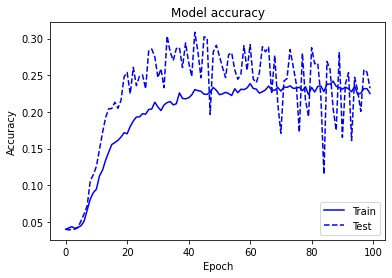

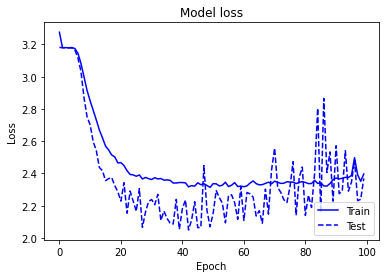

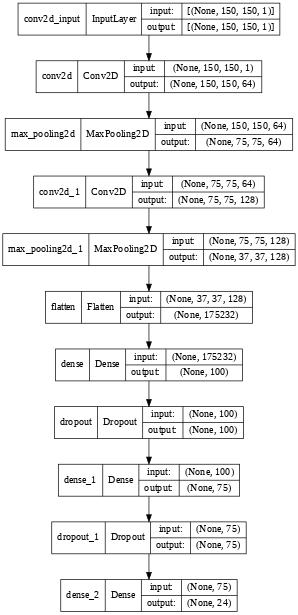

In [ ]:
# Plot accuracy
plt.plot(history_classifier.history['accuracy'],color='blue')
plt.plot(history_classifier.history['val_accuracy'],color='blue',linestyle='--')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig(path + 'model_cnn_clock_v1_acc.png')
plt.show()

# Plot loss
plt.plot(history_classifier.history['loss'],color='blue')
plt.plot(history_classifier.history['val_loss'],color='blue',linestyle='--')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig(path + 'model_cnn_clock_v1_loss.png')
plt.show()

tf.keras.utils.plot_model(
    model_classifier, to_file=path + 'model_cnn_clock_v1.png', 
    show_shapes=True, 
    show_dtype=False,
    show_layer_names=True, 
    rankdir='TB', 
    expand_nested=False, 
    dpi=50,
    layer_range=None,
)

In [ ]:
# Test a different version (V5) of network similar to final CNN 

batch_size = 32
epochs = 100

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

model_classifier = keras.models.Sequential([
  DefaultConv2D(filters=64, kernel_size=3, input_shape=[150, 150, 1]),
  keras.layers.MaxPooling2D(pool_size=2),
  DefaultConv2D(filters=128),
  DefaultConv2D(filters=128),
  keras.layers.MaxPooling2D(pool_size=2),
  DefaultConv2D(filters=256),
  DefaultConv2D(filters=256),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Flatten(),
  keras.layers.Dense(units=100, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(units=75, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(units=24, activation='softmax'),
])


model_classifier.compile(loss=[keras.losses.categorical_crossentropy], 
                         optimizer=tf.keras.optimizers.RMSprop(), 
                         metrics=['accuracy'])

history_classifier = model_classifier.fit(clock_train_x, 
                                          clock_train_y, 
                                          batch_size=batch_size, 
                                          epochs=epochs, 
                                          validation_split = 0.2)

In [ ]:
# Plot accuracy
plt.plot(history_classifier.history['accuracy'],color='blue')
plt.plot(history_classifier.history['val_accuracy'],color='blue',linestyle='--')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig(path + 'model_cnn_clock_v2_acc.png')
plt.show()

# Plot loss
plt.plot(history_classifier.history['loss'],color='blue')
plt.plot(history_classifier.history['val_loss'],color='blue',linestyle='--')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig(path + 'model_cnn_clock_v2_loss.png')
plt.show()

tf.keras.utils.plot_model(
    model_classifier, to_file=path + 'model_cnn_clock_v2.png', 
    show_shapes=True, 
    show_dtype=False,
    show_layer_names=True, 
    rankdir='TB', 
    expand_nested=False, 
    dpi=50,
    layer_range=None,
)

# Regression

In [ ]:
# For regression model we want the time from e.g [5. 36.] in format y = 5.36
# So we want y=clock_target[i][0].clock_target[i][1]
def time_changer(initial):
  hr = initial[0]
  min = initial[1]/60
  time = hr + min
  return time


clock_target_reg_format = []
for i in clock_target:
    clock_target_reg_format.append(time_changer(i))
clock_target_reg_format = np.array(clock_target_reg_format).astype("float32")


# Now we put aside 80% for the train set, and 20% for the test set
clock_train_x = clock_data[:int(0.3*len(clock_data))]
clock_train_y = clock_target_reg_format[:int(0.8*len(clock_data))]
clock_test_x = clock_data[int(0.3*len(clock_data)):]
clock_test_y = clock_target_reg_format[int(0.8*len(clock_data)):]

In [ ]:
####        Scaling and transforming to periodic function values        ###
# 0 to 1 by using divide by 12, and then times (2*pi)
clock_target_sin = np.array(np.sin(2* np.pi * (clock_target_reg_format/ 12)))
clock_target_cos = np.array(np.cos(2* np.pi * (clock_target_reg_format/ 12)))
clock_target_sin_cos = np.column_stack((clock_target_sin,clock_target_cos))

# Now we put aside 80% for the train set, and 20% for the test set
#First 20% actually and then building up
clock_train_x = clock_data[:int(0.2*len(clock_data))]
clock_train_y = clock_target_sin_cos[:int(0.8*len(clock_data))]
clock_test_x = clock_data[int(0.2*len(clock_data)):]
clock_test_y = clock_target_sin_cos[int(0.8*len(clock_data)):]

In [ ]:
batch_size = 32
epochs = 2

# input image dimensions
clock_train_x = clock_train_x.reshape(-1, 150, 150, 1)
clock_test_x = clock_test_x.reshape(-1, 150, 150, 1)
#input_shape is (150, 150, 1)


model_simple_reg = keras.models.Sequential([
    keras.layers.Conv2D(64,kernel_size=5, activation='relu', input_shape=(150,150,1)),
    keras.layers.Conv2D(128,kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation='linear')
    ])

model_simple_reg = tf.keras.Model(inputs=input, 
                           outputs=output_layer,
                           name='model_simple_reg')

model_simple_reg.compile(loss='mean_squared_error',
                  optimizer=tf.keras.optimizers.RMSprop(),
                  metrics='mae')

history_reg = model_simple_reg.fit(clock_train_x, clock_train_y, batch_size=batch_size, epochs=epochs)

mse_test = model_simple_reg.evaluate(clock_test_x, clock_test_y)

In [ ]:
# Plot accuracy
plt.plot(history_reg.history['loss'],color='blue')
plt.plot(history_reg.history['val_loss'],color='blue',linestyle='--')
plt.title('Model regression accuracy')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('model_regression_clock_mse.png')
plt.show()

# Plot loss
plt.plot(history_reg.history['mae'],color='blue')
plt.plot(history_reg.history['val_mae'],color='blue',linestyle='--')
plt.title('Model regression mae')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('model_regression_clock_mae.png')
plt.show()


tf.keras.utils.plot_model(
    model_simple_reg, to_file='model_regression_clock.png', 
    show_shapes=True, 
    show_dtype=False,
    show_layer_names=True, 
    rankdir='TB', 
    expand_nested=False, 
    dpi=50,
    layer_range=None,
)